In [1]:
%matplotlib inline
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Code 2.1

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

#### Code 2.2

$$Pr(w \mid n, p) =  \frac{n!}{w!(n − w)!} p^w (1 − p)^{n−w}$$


The probability of observing six W’s in nine tosses—under a value of p=0.5

In [3]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000003

#### Code 2.3 and 2.5

Computing the posterior using a grid approximation.

In the book the following code is not inside a function, but this way is easier to play with different parameters

In [4]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#### Code 2.3

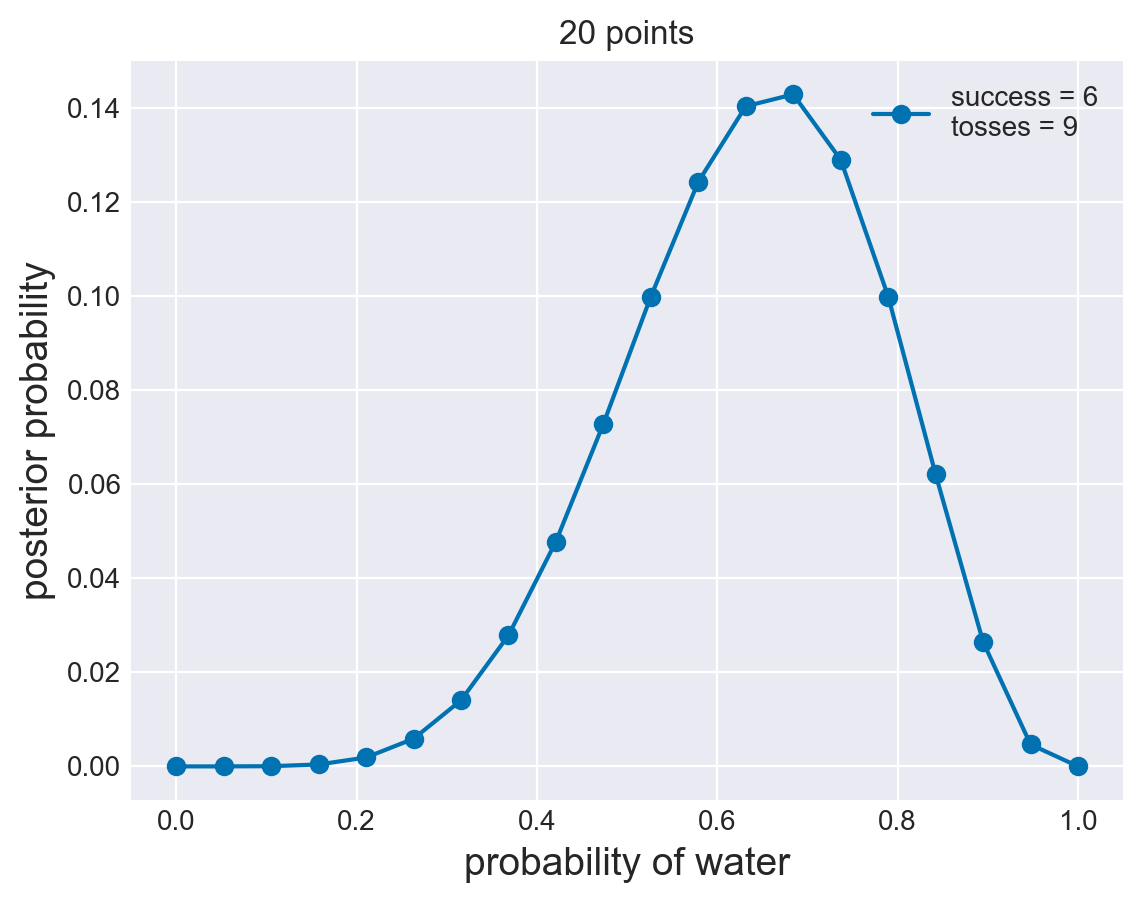

In [5]:
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

#### Code 2.6

Computing the posterior using the quadratic approximation

In [ ]:
data = np.repeat((0, 1), (w, n))
with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    trace = pm.sample(1000, tune=1000, return_inferencedata=False)
    
    mean_q = np.mean(trace['p'])
    std_q = np.std(trace['p'])  # Use posterior standard deviation directly
print(mean_q, std_q)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


0.6349441116700661 0.13996225453064973


In [78]:
##Make shift precis table as shown in 2.6

norm = stats.norm(mean_q, std_q)
prob = .89
lower = stats.norm.ppf((1-prob)/2)
upper = stats.norm.ppf((1+prob)/2)
lower_pi = mean_q + std_q * lower 
upper_pi = mean_q + std_q * upper 

print(f"Mean: {mean_q}\nStdDev: {std_q}\n5.5%: {lower_pi}\n95.5%: {upper_pi}")

Mean: 0.6349441116700661
StdDev: 0.13996225453064973
5.5%: 0.41125739663105043
95.5%: 0.858630826709082


#### Code 2.7

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


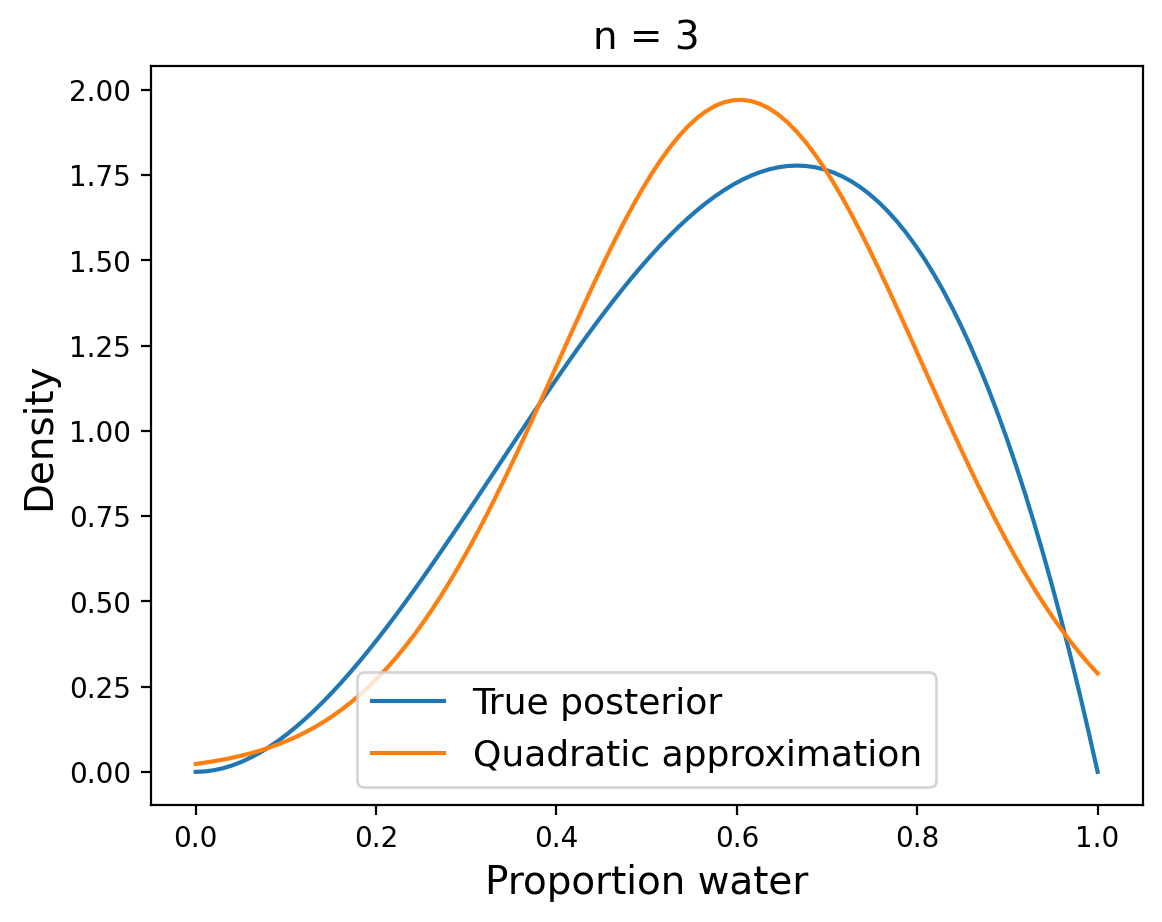

In [89]:
# analytical calculation
w, n = 2, 3
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

data = np.repeat((0, 1), (n-w,w))
with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    trace = pm.sample(1000, tune=1000, return_inferencedata=False)
    
    mean_q = np.mean(trace['p'])
    std_q = np.std(trace['p'])  # Use posterior standard deviation directly
# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q, std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

---
#### C2E1
**Question**: Which of the expressions below correspond to the statement: the probability of rain on Monday?

1. $\textstyle Pr(\text{rain}) $
2. $\textstyle Pr(\text{rain} \mid \text{Monday}) $
3. $\textstyle Pr(\text{Monday} \mid \text{rain}) $
4. $\textstyle \frac{Pr(\text{rain} , \text{Monday})}{Pr(\text{Monday})} $

---
<details>
<summary>Answer</summary>

#### *#2 is the correct answer*

Explanation: 

$\textstyle Pr(\text{rain} \mid \text{Monday}) $
reads as "the probability that it is raining and a Monday, divided by the probability of it being a Monday," which is the same as "the probability of rain, given that it is Monday." This is simply just Bayes' theorem in action.
</details>


---
#### C2E2
**Question**: Which of the following statements corresponds to the expression: $\textstyle Pr(\text{Monday} \mid \text{rain}) $

1. The probability of rain on Monday.
2. The probability of rain, given that it is Monday.
3. The probability that it is Monday, given that it is raining.
4. The probability that it is Monday and that it is raining.

---
<details>
<summary>Answer</summary>

### 3. The probability that it is Monday, given that it is raining.

</details>


---
#### C2E3
**Question**: Which of the expressions below correspond to the statement: the probability that it is Monday, given that it is raining?

1. $\textstyle Pr(\text{Monday} \mid \text{rain}) $
2. $\textstyle Pr(\text{rain} \mid \text{Monday}) $
3. $\textstyle \frac{Pr(\text{rain} \mid \text{Monday}) Pr(\text{Monday})}{Pr(\text{rain})} $
4. $\textstyle \frac{Pr(\text{Monday} \land \text{rain})}{Pr(\text{rain})} $
5. $\textstyle \frac{Pr(\text{Monday} \mid \text{rain}) Pr(\text{rain})}{Pr(\text{Monday})} $

---
<details>
<summary>Answer</summary>

1. $ \textstyle Pr(\text{Monday} \mid \text{rain}) $

and

4. $ \textstyle \frac{Pr(\text{Monday} \land \text{rain})}{Pr(\text{rain})} $
</details>


---
#### C2E4
**Question**:
The Bayesian statistician Bruno de Finetti (1906-1985) began his book on probability theory with the declaration: "PROBABILITY DOES NOT EXIST." This was appended in the original, so I imagine de Finetti wanted us to shout the statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say "the probability of water is 0.7?"

---
<details>
<summary>Answer</summary>
Per McElrath: 

>This problem is merely a prompt for readers to explore intuitions about probability. The goal is
to help understand statements like “the probability of water is 0.7” as statements about partial knowledge, not as statements about physical processes. The physics of the globe toss are deterministic, not
“random.” But we are substantially ignorant of those physics when we toss the globe. So when someone states that a process is “random,” this can mean nothing more than ignorance of the details that
would permit predicting the outcome.
As a consequence, probabilities change when our information (or a model’s information) changes.
Frequencies, in contrast, are facts about particular empirical contexts. They do not depend upon our
information (although our beliefs about frequencies do).
This gives a new meaning to words like “randomization,” because it makes clear that when we
shuffle a deck of playing cards, what we have done is merely remove our knowledge of the card order.
A card is “random” because we cannot guess it.
</details>


---
#### C2M1
**Question**: 
Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

1. W,W,W
2. W,W,W,L
3. L,W,W,L,W,W,W

---
<details>

<summary>Answer</summary>

Use grid_approximation function and adjust w's and n's as appropriate:


```
        def posterior_grid_approx(grid_points=5, success=6, tosses=9):

                # define grid
                p_grid = np.linspace(0, 1, grid_points)

                # define prior
                prior = np.repeat(5, grid_points)  # uniform

                # compute likelihood at each point in the grid
                likelihood = stats.binom.pmf(success, tosses, p_grid)

                # compute product of likelihood and prior
                unstd_posterior = likelihood * prior

                # standardize the posterior, so it sums to 1
                posterior = unstd_posterior / unstd_posterior.sum()
                return p_grid, posterior 
```

1. 
```
        points = 20
        w, n = 3, 3
        p_grid, posterior = posterior_grid_approx(points, w, n)
        plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
        plt.xlabel('probability of water', fontsize=14)
        plt.ylabel('posterior probability', fontsize=14)
        plt.title('{} points'.format(points))
        plt.legend(loc=0)
```

2. 
```
        points = 20
        w, n = 3, 4
        p_grid, posterior = posterior_grid_approx(points, w, n)
        plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
        plt.xlabel('probability of water', fontsize=14)
        plt.ylabel('posterior probability', fontsize=14)
        plt.title('{} points'.format(points))
        plt.legend(loc=0)
```

3. 
```
        points = 20
        w, n = 5, 7
        p_grid, posterior = posterior_grid_approx(points, w, n)
        plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
        plt.xlabel('probability of water', fontsize=14)
        plt.ylabel('posterior probability', fontsize=14)
        plt.title('{} points'.format(points))
        plt.legend(loc=0)
```
</details>

---
#### C2M2

**Question**: Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes–you don’t know which–was tossed in the air and produces a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” ($\textstyle  Pr(\text{Earth} \mid \text{land}) $), is 0.23.

---

<details>
<summary>Answer</summary>

Bayes theorem:
$ P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)} $


Prior = .5 (before we tossed and saw the land, we knew there was a 50/50 chance we've selected earth)

Likelihood = .3 (probability of Land _given_ we picked earth, we know this is .3)

Evidence = .5 * .3 + .5 * 1 (if we picked Mars and got land + if we picked Earth and got land)

Prior * Likelihood = .15

Evidence = .5 * .3 + .5 * 1 = .15 + .5 = .65

Posterior Probability = .15 / .65 = .2307

</details>

---
#### C2M4

**Question**: Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the colour of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black card facing up on the table).

---

<details>
<summary>Answer</summary>

`Card 1` = B B

`Card 2` = B W

`Card 3` = W W

Since `Card 1` is the only card that could possibly produce another black side, the question is really asking "what are the chances you pulled `Card 1`?"  Well since you know the side facing up is black, you can "count" the way each `card` could have produced a "black face."

| Conjectures     | Ways of Producing B  |
|-----------------|----------------------|
| `Card 1` [BB]   |         2            |
| `Card 2` [BW]   |         1            |
| `Card 3` [WW]   |         0            |
 

So since you know it cannot be `Card 3` it must be `Card 1` or `Card 2`.  There are now 3 possible "black faces" that could be showing up.  Since `Card 1` has 2 of the 3 ways of producing B and `Card 2` only has 1, there's a 2/3 chance you have `Card 1`.

</details>

---
#### C2M5

**Question**: Now suppose there are four cards: BB, BW, WW, and another BB. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

---
<details>
<summary>Answer</summary>

`Card 1` = B B

`Card 2` = B W

`Card 3` = W W

`Card 4` = B B

Same basic tact as above just with different info:  What are the chances now that it was `Card 1` or `Card 4`

| Conjecture      | Ways of Producing B |
|-----------------|---------------------|
| `Card 1` [BB]   |        2            |
| `Card 2` [BW]   |        1            |
| `Card 3` [WW]   |        0            |
| `Card 4` [BB]   |        2            |

So now there is 5 possible black faces that could have shown up.  4 out of 5 belong to `Card 1` or `Card 4` so there's now an 80% (4/5) chance the other face is black.
 

</details>



---
#### C2M5

**Question**: Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume that there are three cards: BB, BW, and WW. After experimenting a number of times, you conclude that for every way to pull the BB card from the bag, there are 2 ways to pull the BW card and 3 ways to pull the WW card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

---
<details>
<summary>Answer</summary>

`Card 1` = B B

`Card 2` = B W

`Card 3` = W W



| Conjecture   | Ways to Pull Card   | Ways of Producing B |  Likelihood of Card    |
|--------------|---------------------|---------------------|------------------------|
| `Card 1` [BB]|         1           |          2          |      1 x 2 = 2         |
| `Card 2` [BW]|         2           |          1          |      2 x 1 = 2         |
| `Card 3` [WW]|         3           |          0          |      3 X 0 = 0         |


Before we tacitly assumed there was a 1/3 chance of pulling each of the three cards from the bag.  Now that's changed and we basically weigh it like a prior and multiple the `Ways to Pull Card` x `Ways of Producing B` to get our new likelihoods.  So now there are 4 "ways" (for lack of a better phrase) of pulling either `Card 1` or `Card 2` and there are 2 each. Thus the chances the other side is black (aka we've pulled `Card 1`) is 2/4 or 50%.

</details>

---
#### C2M7

#### Question: 
Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.


---
<details>
<summary> 
Answer
</summary>



`Card 1` = B B

`Card 2` = B W

`Card 3` = W W



| Conjectures   |  Ways to be First Card |   Ways to be Second Card  |
|--------------|------------------------|---------------------------|
| `Card 1` [BB]|         2 / 3          |           0 / 3           |
| `Card 2` [BW]|         1 / 3          |           1 / 3           |
| `Card 3` [WW]|         0 / 3          |           2 / 3           |
 
There are only 3 possible combinations of Cards that could produce a B first and W second:
`Card 1` & `Card 2`  
`Card 1` & `Card 3`   
`Card 2` & `Card 3`   

Therefore our new conjectures:

|     Conjectures    |  Prob First * Prob Second|   Combined Probs    |
|--------------------|--------------------------|---------------------|
|`Card 1` & `Card 2` |          2/3 * 1/3       |        .2178        |
|`Card 1` & `Card 3` |          2/3 * 2/3       |        .4356        |
|`Card 2` & `Card 3` |          1/3 * 2/3       |        .2178        |

So if we want to know what are the chances it was one:

`Card 1` & `Card 2`  

`Card 1` & `Card 3` 

We take:

(.2178 + .4356) / (.2178 + .4356 + .2178) [aka the sum of all the possible outcomes]

= .75
</details>

---
#### C2H1

#### Question: 
Suppose there are two species of panda bear. Both are equally common in the wild and live in the same place. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?
<summary> 

---
<details>

<summary>
Answer
</summary>

So the question is asking "What are the chances of birthing twins twice?"  In probability terms, this is asking:

$
P(\text{twins}_2 \mid \text{twins}_1) = \frac{P(\text{twins}_1, \text{twins}_2)}{P(\text{twins})}
$

So we have to figure out the `Probability of Having Twins Both Times` and then condition (read: divide it by)  `Probability of Having Twins the First Time`.

**Probability of having twins the first time**:
| Conjecture   | Ways to pick species | Ways of producing twins |  Likelihood of Species    |
|--------------|----------------------|-------------------------|---------------------------|
| `Species A`  |         .5           |          .1             |        .5 x .1 = .05      |
| `Species B`  |         .5           |          .2             |        .5 x .2 = .10      |


So based on the table above we have a .15 chance of birthing twins on the first time.


**Probability of having twins both times**:
| Conjecture         | Ways to pick species |  Twins first time  | Twins second time |     Twins both times      |
|--------------------|----------------------|--------------------|-------------------|---------------------------|
| `Species A Twins`  |         .5           |          .1        |        .1         |    .5 x .1 x .1 = .005    |
| `Species B Twins`  |         .5           |          .2        |        .2         |    .5 x .2 x .2 = .02     |


So based on the table above we have a .025 chance of having twins both times.

So we then use:
.025 / .15 = 16.667% Chance of having twins the second time given we had twins the first time.

</details>


---
#### C2H2

#### Question: 
 Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

---
<details>
<summary> 
Answer
</summary>

For this we'll use Bayes Theroem but replace A and B with ${Species}_A$ and ${twins}$:

$
P(\text{Species}_A \mid \text{twins}) = \frac{P(\text{twins} \mid \ \text{Species}_A) P(\text{Species}_A)}{P(\text{twins})}
$

The Prior is simple here.  We had a 50% (.5) chance of picking Species A before we knew of the birth of twins.

$P({Species}_A) $ = .5

The Likelihood is also relatively simple.  We have a 10% (.1) chance of seeing twins _given_ it's Species A.

$P(\text{twins} \mid \ \text{Species}_A)$ = .1

The probability of any birth of twins however is slightly more math-y.  In that we need to consider the chance that the twins we've observed _could_ have come from `Species A` or `Species B`

$P({twins}) $ = .5 * .1 + .5 * .2 = .05 + .1 = .15

Putting it all together we have

$\frac{0.1 \cdot 0.5}{0.15} = \text{0.33}
$


</details>


---
#### C2H3

#### Question: 
 Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

 ---
 <details>
<summary> 
Answer:
</summary>


This is a classic case of using `Bayesian Updating` so that we don't have to re-create our work from scratch.  We've already determined the probability of having twins first with our work above:

$P(\text{Species}_A \mid \text{twins}) = \text{0.33}
$

Now we just replace the prior of .5 with .33 and continue with our new evidence; in this case a single birth next.

Our Prior is now:

$
P(\text{Species}_A) = \text{0.33}
$

Our Likelihood is now a Single birth instead of twins:

$
P(\text{single} \mid \ \text{Species}_A) = \text{0.9}
$

The Total Likelihood of the Evidence (aka the Chance of seeing a single birth from either `Species A` or `Species B`) is a combination of the two:

$
P(\text{single}) = \text{(.33 * .9) + (.67 * .8)} = \text {.833}
$

Putting it all together:

$
P(\text{Species}_A \mid \text{twins}) = 
\frac{P(\text{single} \mid \ \text{Species}_A) P(\text{Species}_A)}{P(\text{single})} = 
\frac{{.9}  \cdot\ {.33}}{.833} = 
{.36}
$
</details>

---
#### C2H3a

#### Question: 
A common boast of Bayesian statisticians is that Bayesian inferences makes it easy to use all of the data, even if the data are of different types. So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:

    The probability it correctly identifies a species A panda is 0.80.
    The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well.

---
<details>
<summary> 
Answer
</summary>



Ultimately what we need to uncover here are all the ways we could test + for A (we'll call this `+ATEST`).  
There are two:
- `You could be an A and +ATEST` (true positive)
- `You could be a  B and +ATEST` (false negative)

Conceptually the harder part is how to calculate `B and +ATEST`.  A false negative is when the test incorrectly fails you.  In this universe it would be the failure rate of identifying you as a b.  In other words, 1 - .65 (the true positive for B).  Therefore there are two ways to test+

- $ \text P(\text{+ATEST} \mid \text{A}) = \text{.8}$
- $ \text P(\text{+ATEST} \mid \text{B}) = \text{1 - .65} = \text{.35}$

Once we have this info the rest is just plug and play Bayes:

$
 \text P(\text{A} \mid \text{+ATEST}) =  
 \frac{P(\text{+ATEST} \mid \ \text{A}) P(\text{A})}{P(\text{+ATEST})}
$

**Prior**

$
P(\text{A})
$

We have no way of knowing which Species we had prior so we assume it's .5 for both A and B

**Likelihood**

$
 \text P(\text{+ATEST} \mid \text{A}) = \text{.8}
$

The likelihood we have a `Species A Panda` **AND** `+ATest` is the "true postiive" rate: .8

**Total Likelihood**

$ 
\text P(\text{+ATEST})
$

Here we're going to do the same calculating as above but here it is in table format:

|  Conjectures   |  Initial chance  |  Vet Test  |    Outcome    |  Total  |
|----------------|------------------|------------|---------------|---------|
|  `A` & +ATest  |        .50       |     .80    |   .50 * .80   |   .400  |
|  `B` & +ATest  |        .50       |     .35    |   .50 * .35   |   .175  |

**Putting it all together**

$
\text P(\text{A} \mid \text{+ATEST}) =  
\frac{P(\text{+ATEST} \mid \ \text{A}) P(\text{A})}{P(\text{+ATEST})} = 
\frac{.8 \cdot\ .5}{ \text{.575}} =
\text{.6987}
$







</details>

---
#### C2H3b

#### Question: 

Now redo your calculation, now using the birth data as well.

Editor's Note: I'm assuming the birth data in this case are the first birth was twins and the second birth was single.


---
<details>
<summary> 
Answer
</summary>



Ultimately the order you introduce the data does not matter.  So we can use either as the prior and get the same final probability.  Let's use the birth data as the prior then introduce the test data.


**Prior**

$
P(\text {A}) = \text{.36}
$

$
P(\text {B}) = \text{.64}
$

**Likelihood**

$
P(\text {ATEST+} \mid \text{A} ) = \text{.8}
$

**Total Evidence**

$
P(\text {ATEST+} \mid \text{A} ) * P(\text {A}) + P(\text {ATEST+} \mid \text{B} ) * P(\text {B}) =
\text{.8} \cdot \text{.36} + \text{.35} \cdot \text{.64} = 
.512
$

**Putting It All Together**

$
\text P(\text{A} \mid \text{+ATEST}) =  
\frac{P(\text{+ATEST} \mid \ \text{A}) P(\text{A})}{P(\text{+ATEST})} = 
\frac{.8 \cdot\ .36}{ \text{.512}} =
\text{.5625}
$
</details>

---



In [1]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__))

AttributeError: module 'platform' has no attribute 'linux_distribution'